In [45]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from ipywidgets import interact, Button
import ipywidgets as widgets
import scipy.ndimage as ndimage

In [2]:
sys.path.insert(1, os.path.join(os.path.join(os.path.abspath(""), os.pardir), os.pardir))
import glutamate_roi_finder as grf
grf.Start_Background()
%matplotlib inline  

In [23]:
print(grf.API_IMG().imgDiffMaxSpatial[158:165])

[ 7  8 55  7  7  8  8]


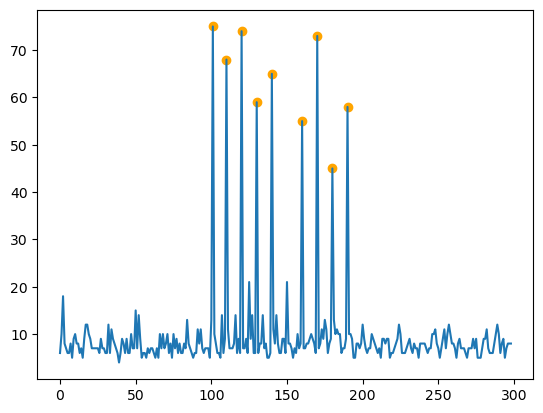

In [78]:
from scipy.signal import find_peaks
def CalcSignalPeaks():
    peaks, props = find_peaks(grf.API_IMG().imgDiffMaxSpatial, prominence=20)
    return peaks

_peaks = CalcSignalPeaks()
#plt.plot(range(100,200), grf.API_IMG().imgDiffMaxSpatial[100:200])
plt.plot(grf.API_IMG().imgDiffMaxSpatial)
plt.scatter(_peaks, grf.API_IMG().imgDiffMaxSpatial[_peaks], c="orange")
plt.show()

In [6]:
_diffMin = np.max(grf.API_IMG().imgDiff)
def Plot(frame):
    global fig,ax,_diffMin
    fig, ax = plt.subplots()
    ax.imshow(grf.API_IMG().imgDiff[frame], vmin=0, vmax=_diffMin)
    plt.show()

interact(Plot, frame=widgets.IntSlider(min=0, max=grf.API_IMG().imgDiff.shape[0]-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='frame', max=298), Output()), _dom_classes=('widget-inter…

<function __main__.Plot(frame)>

In [14]:
_diffMin = np.max(grf.API_IMG().imgDiff)
_peaks = CalcSignalPeaks()
def Plot(peak):
    global fig,ax,_diffMin,_peaks
    fig, ax = plt.subplots()
    ax.imshow(grf.API_IMG().imgDiff[_peaks[peak]], vmin=0, vmax=_diffMin)
    plt.show()

interact(Plot, peak=widgets.IntSlider(min=0, max=(len(_peaks)-1), step=1, value=0))

interactive(children=(IntSlider(value=0, description='peak', max=8), Output()), _dom_classes=('widget-interact…

<function __main__.Plot(peak)>

In [43]:
_diffMax = np.max(grf.API_IMG().imgDiff)
print(_diffMax)
_peaks = CalcSignalPeaks()
X = np.arange(0,grf.API_IMG().imgDiff.shape[2])
Y = np.arange(0,grf.API_IMG().imgDiff.shape[1])
X, Y = np.meshgrid(X, Y)
def Plot(peak):
    global fig,ax,_diffMax,_peaks, X,Y 
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) 
    ax.axes.set_zlim3d(bottom=0, top=_diffMax) 
    ax.plot_surface(X,Y, grf.API_IMG().imgDiff[_peaks[peak]], cmap=cm.coolwarm, vmin=0, vmax=_diffMax/4)
    plt.show()

interact(Plot, peak=widgets.IntSlider(min=0, max=(len(_peaks)-1), step=1, value=0))

75


interactive(children=(IntSlider(value=0, description='peak', max=8), Output()), _dom_classes=('widget-interact…

<function __main__.Plot(peak)>

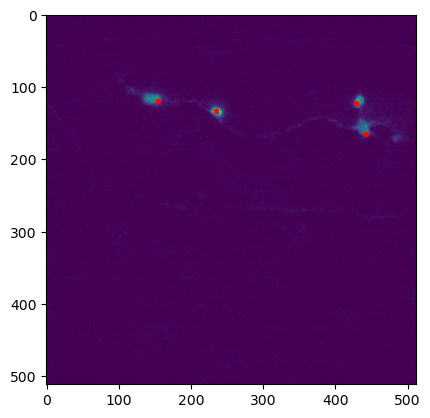

In [74]:
#frame0MaxFilter = ndimage.maximum_filter(grf.API_IMG().imgDiff[_peaks[0]], size=(50))
plt.imshow(grf.API_IMG().imgDiff[_peaks[0]], vmin=0, vmax=_diffMin)
plt.plot(frame0LocalMax[:, 1], frame0LocalMax[:, 0], 'r.')
plt.show()

In [70]:
import skimage.feature as skfeature
frame0LocalMax = skfeature.peak_local_max(grf.API_IMG().imgDiff[_peaks[0]], min_distance=10,threshold_abs=20)
print(len(frame0LocalMax))
print(frame0LocalMax)

4
[[133 235]
 [122 429]
 [119 154]
 [165 442]]


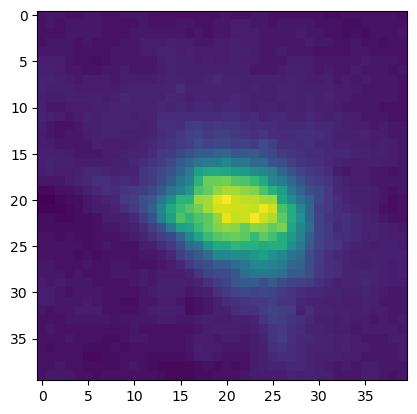

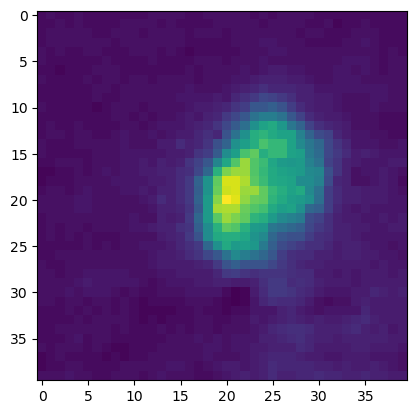

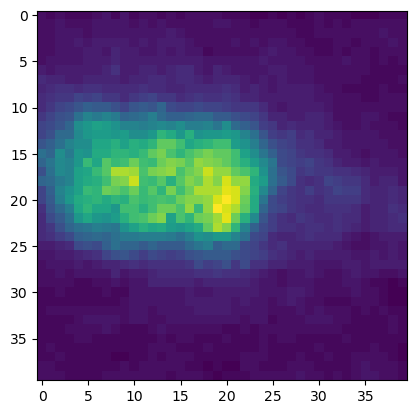

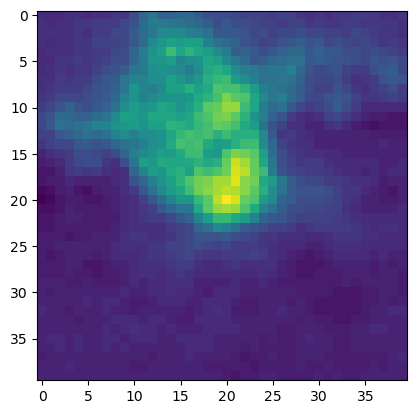

In [81]:
localImages = []
for i in range(len(frame0LocalMax)):
    localMax = frame0LocalMax[i]
    y, x = localMax
    localImages.append(grf.API_IMG().imgDiff[_peaks[0], (y-20):(y+20), (x-20):(x+20)])
    plt.imshow(localImages[i])
    plt.show()

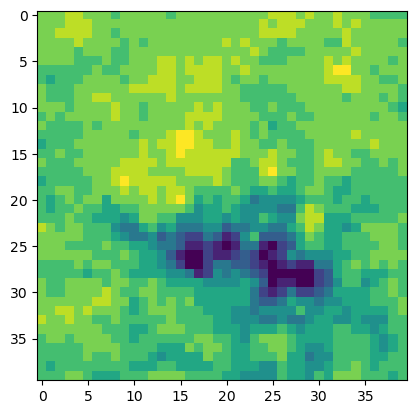

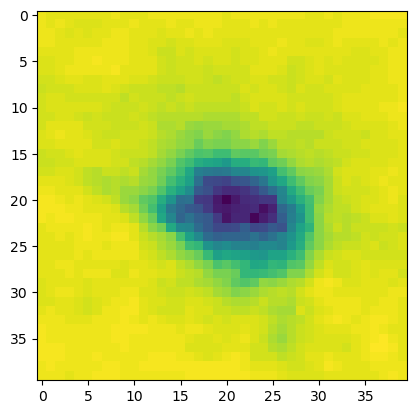

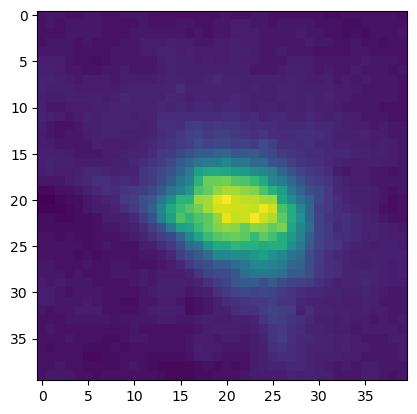

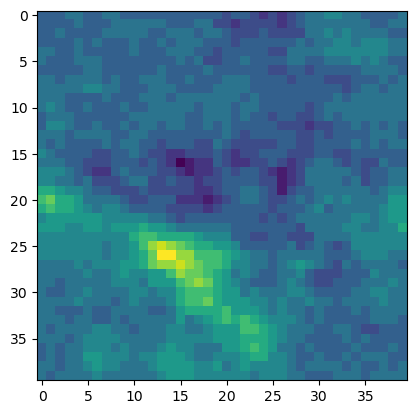

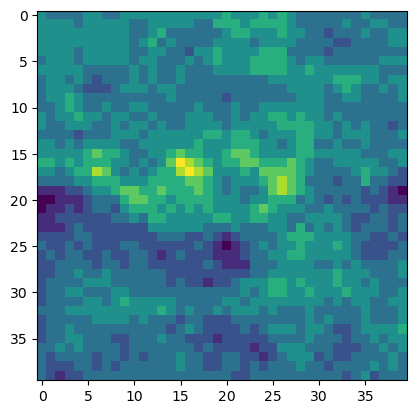

In [82]:
localMax = frame0LocalMax[0]
y, x = localMax
for i in range(-2,3):
    plt.imshow(grf.API_IMG().imgDiff[_peaks[0]-i, (y-20):(y+20), (x-20):(x+20)])
    plt.show()

1D seitlicher Plot


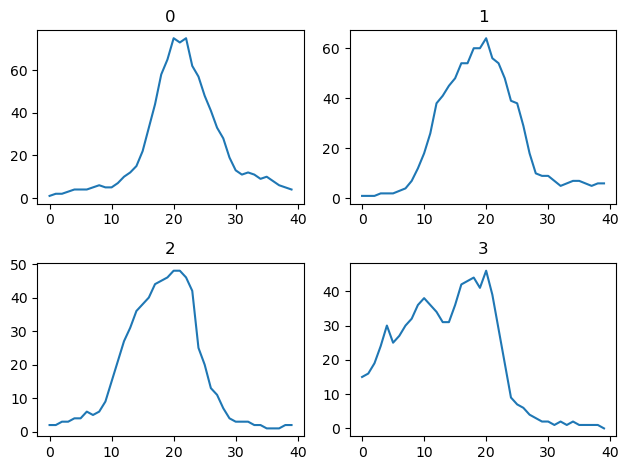

In [103]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes = axes.flatten()
for i in range(len(localImages)):
    locImg = localImages[i]
    locImg1D = np.max(locImg, axis=1)
    axes[i].plot(locImg1D)
    axes[i].set_title(i)
plt.tight_layout()
plt.show()

In [ ]:
axes[1].set_title("")